# Cluster Sucursales 

### Importar paquetes y funciones:

In [361]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
from sklearn.metrics import adjusted_rand_score
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans
import pandas as pd
from sklearn import preprocessing 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

### Leer la base de datos:

In [362]:
df = pd.read_excel('C:/Users//.xlsx', sheet_name='clust_PB_2')

In [363]:
 #%% Se eliminan filas que tengan valor NaN.
df = df.dropna()
df = df.reset_index(drop=True)
df.describe()
df.head()

,SUCURSAL,Cod Sucursal2,Principalidad,SBIF,Riesgo,N Clientes,Promedio,COMISIONES,MARGEN ACTIVOS,MARGEN PASIVOS,VOLUMEN PUNTA
0,MONEDA,2,241.917740,70.654829,0.568929,2720,48.411248,6.912655e+08,3.363777e+09,3.551404e+08,1.690264e+12
1,VALPARAISO,5,247.251843,52.274558,0.591144,2238,52.917515,5.301941e+08,2.292137e+09,3.017366e+08,1.057006e+12
2,CONCEPCION,6,248.739597,51.897279,0.619932,3114,60.127741,7.468141e+08,2.809120e+09,4.925571e+08,1.835809e+12
3,VIÑA DEL MAR,7,250.510453,57.895966,0.580076,4188,69.696102,1.014906e+09,3.944086e+09,6.077975e+08,2.103072e+12
4,LA DEHESA,9,247.845893,98.104367,0.603419,1729,46.008243,4.747228e+08,1.876761e+09,2.342828e+08,1.130409e+12


In [388]:
df=df.loc[df['SUCURSAL']!='PERSONAL BANK DIGITAL 2']

In [389]:
df

,SUCURSAL,Cod Sucursal2,Principalidad,SBIF,Riesgo,N Clientes,Promedio,COMISIONES,MARGEN ACTIVOS,MARGEN PASIVOS,VOLUMEN PUNTA,label
0,MONEDA,2,241.917740,70.654829,0.568929,2720,48.411248,6.912655e+08,3.363777e+09,3.551404e+08,1.690264e+12,1
1,VALPARAISO,5,247.251843,52.274558,0.591144,2238,52.917515,5.301941e+08,2.292137e+09,3.017366e+08,1.057006e+12,2
2,CONCEPCION,6,248.739597,51.897279,0.619932,3114,60.127741,7.468141e+08,2.809120e+09,4.925571e+08,1.835809e+12,1
3,VIÑA DEL MAR,7,250.510453,57.895966,0.580076,4188,69.696102,1.014906e+09,3.944086e+09,6.077975e+08,2.103072e+12,0
4,LA DEHESA,9,247.845893,98.104367,0.603419,1729,46.008243,4.747228e+08,1.876761e+09,2.342828e+08,1.130409e+12,1
5,IV CENTENARIO,14,248.638522,87.509841,0.629147,2470,40.904057,7.343826e+08,2.915984e+09,4.111352e+08,1.942534e+12,0
6,MANUEL MONTT,23,241.141387,88.371295,0.604129,1664,43.631313,4.200695e+08,1.729389e+09,2.279279e+08,1.039502e+12,2
7,PEDRO DE VALDIVIA,25,248.231030,75.283629,0.597230,1848,43.592437,4.410546e+08,1.876935e+09,2.123666e+08,1.151214e+12,0
8,NUEVA YORK,31,242.681917,65.700344,0.590361,2458,40.269997,5.657763e+08,2.664715e+09,3.052007e+08,1.423049e+12,2
9,LOS COBRES,39,244.873095,82.442190,0.627119,1635,62.356322,4.512685e+08,1.893183e+09,2.202464e+08,1.185249e+12,1


In [ ]:
#,"VOLUMEN PUNTA","Principalidad","SBIF","Riesgo","N Clientes","Promedio","COMISIONES"

### Declarar matriz X y el vector y:

In [419]:
X=np.array(df[['MARGEN ACTIVOS',"MARGEN PASIVOS"]])
y=np.array(df['SUCURSAL'])
X.shape

(22, 2)

In [420]:
y.shape

(22,)

In [421]:
y

array(['MONEDA', 'VALPARAISO', 'CONCEPCION', 'VIÑA DEL MAR', 'LA DEHESA',
       'IV CENTENARIO', 'MANUEL MONTT', 'PEDRO DE VALDIVIA', 'NUEVA YORK',
       'LOS COBRES', 'ESTORIL', 'AV BRASIL ANTOFAGASTA', 'IQUIQUE SUR',
       'NUEVA COSTANERA', 'MATTA ORIENTE', 'NUEVA PROVIDENCIA',
       'LUIS PASTEUR', 'APOQUINDO', 'EL BOSQUE SAN SEBASTIAN',
       'LA REINA SUR', 'PERSONAL BANK DIGITAL 1', 'EL GOLF'], dtype=object)

In [422]:
X

array([[3.36377726e+09, 3.55140418e+08],
       [2.29213690e+09, 3.01736595e+08],
       [2.80911984e+09, 4.92557065e+08],
       [3.94408581e+09, 6.07797482e+08],
       [1.87676073e+09, 2.34282762e+08],
       [2.91598387e+09, 4.11135186e+08],
       [1.72938888e+09, 2.27927858e+08],
       [1.87693465e+09, 2.12366578e+08],
       [2.66471478e+09, 3.05200651e+08],
       [1.89318326e+09, 2.20246355e+08],
       [1.93017421e+09, 2.13610707e+08],
       [2.16852315e+09, 2.70071333e+08],
       [1.91935473e+09, 2.27608914e+08],
       [2.01925324e+09, 2.10488257e+08],
       [1.59638257e+09, 1.76532690e+08],
       [2.95994484e+09, 3.87465069e+08],
       [1.65211698e+09, 2.12114450e+08],
       [1.64398539e+09, 1.89623781e+08],
       [2.53187985e+09, 3.35057817e+08],
       [2.45553100e+09, 3.50888489e+08],
       [4.71555076e+09, 6.11965226e+08],
       [6.23981100e+09, 9.67981745e+08]])

### Normalizacion de la matriz X de atributos:

In [423]:
min_max_scaler = preprocessing.MinMaxScaler() 
df_escalado = min_max_scaler.fit_transform(X)
df_escalado = pd.DataFrame(df_escalado)

In [424]:
df_escalado = pd.DataFrame(df_escalado)

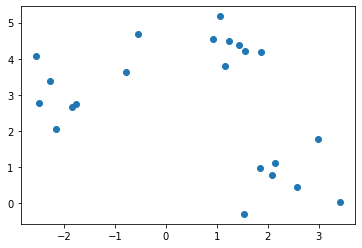

In [425]:
X, y = make_blobs(n_samples=22, centers=3, cluster_std=0.60, random_state=0)
plt.scatter(X[:,0], X[:,1])

In [426]:
X,y

(array([[ 1.1641107 ,  3.79132988],
        [-0.55552381,  4.69595848],
        [ 2.97493505,  1.77927892],
        [-1.83269532,  2.65503768],
        [ 2.57392924,  0.45236465],
        [-2.49524272,  2.79023809],
        [-2.27858123,  3.38437647],
        [ 2.14823598,  1.12456117],
        [ 2.08272263,  0.78535335],
        [ 1.24258802,  4.50399192],
        [ 1.06269622,  5.17635143],
        [ 0.91433877,  4.55014643],
        [ 1.84652023,  0.99147304],
        [-2.55066613,  4.0883475 ],
        [ 1.54632313,  4.212973  ],
        [ 1.43289271,  4.37679234],
        [ 3.4171203 ,  0.02504426],
        [ 1.87271752,  4.18069237],
        [-2.15603579,  2.0658715 ],
        [-1.7593001 ,  2.73650061],
        [ 1.52259607, -0.29081422],
        [-0.7887296 ,  3.63931017]]),
 array([0, 0, 1, 2, 1, 2, 2, 1, 1, 0, 0, 0, 1, 2, 0, 0, 1, 0, 2, 2, 1, 2]))

### Obtener el N° optimo de Clusters que maximiza la disntancia entre los centroides ( entre clusters) y minimiza 
### la distancia entre las oficinas del cluster( Intra clusters), N° optimo=3

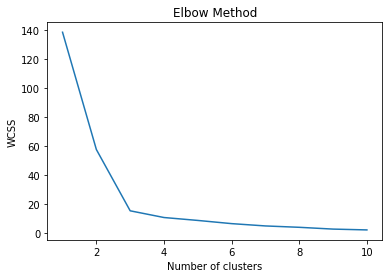

In [427]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### Grafico con 3 Clusters previo:

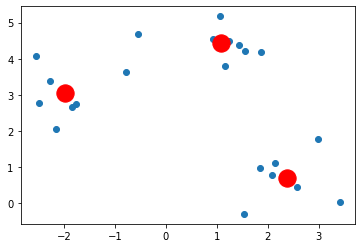

In [428]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=150, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)
plt.scatter(X[:,0], X[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

In [429]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)


In [430]:
y_kmeans

array([0, 0, 2, 1, 2, 1, 1, 2, 2, 0, 0, 0, 2, 1, 0, 0, 2, 0, 1, 1, 2, 1])

### N° de oficinas por Clusters :

In [431]:
from collections import Counter, defaultdict
print(Counter(kmeans.labels_))

Counter({0: 8, 2: 7, 1: 7})


### Grafico de Clusters normalizados:

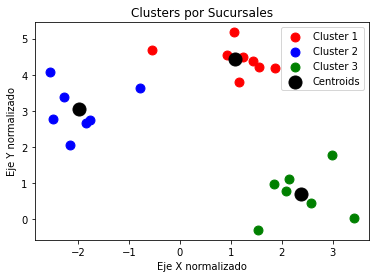

In [432]:
# Visualizacion grafica de los clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 80, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 80, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 80, c = 'green', label = 'Cluster 3')


plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 170, c = 'Black', label = 'Centroids')

plt.title('Clusters por Sucursales')
plt.xlabel('Eje X normalizado')
plt.ylabel('Eje Y normalizado')
plt.legend()
plt.show()

### Centroides:

In [433]:
#%% Aplicación de k-means con k = 3.
kmeans = KMeans(n_clusters=3).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[ 1.08501791  4.43602948]
 [-1.9801787   3.05138315]
 [ 2.36657993  0.69532302]]


In [434]:
kmeans = KMeans(n_clusters=3).fit(X)
kmeans

KMeans(n_clusters=3)

### Etiquetamos nuestro dataframe:

In [435]:
labels = kmeans.predict(X)
df['label'] = labels

<ipython-input-435-e61ee2e19264>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = labels


In [436]:
df

,SUCURSAL,Cod Sucursal2,Principalidad,SBIF,Riesgo,N Clientes,Promedio,COMISIONES,MARGEN ACTIVOS,MARGEN PASIVOS,VOLUMEN PUNTA,label
0,MONEDA,2,241.917740,70.654829,0.568929,2720,48.411248,6.912655e+08,3.363777e+09,3.551404e+08,1.690264e+12,0
1,VALPARAISO,5,247.251843,52.274558,0.591144,2238,52.917515,5.301941e+08,2.292137e+09,3.017366e+08,1.057006e+12,0
2,CONCEPCION,6,248.739597,51.897279,0.619932,3114,60.127741,7.468141e+08,2.809120e+09,4.925571e+08,1.835809e+12,1
3,VIÑA DEL MAR,7,250.510453,57.895966,0.580076,4188,69.696102,1.014906e+09,3.944086e+09,6.077975e+08,2.103072e+12,2
4,LA DEHESA,9,247.845893,98.104367,0.603419,1729,46.008243,4.747228e+08,1.876761e+09,2.342828e+08,1.130409e+12,1
5,IV CENTENARIO,14,248.638522,87.509841,0.629147,2470,40.904057,7.343826e+08,2.915984e+09,4.111352e+08,1.942534e+12,2
6,MANUEL MONTT,23,241.141387,88.371295,0.604129,1664,43.631313,4.200695e+08,1.729389e+09,2.279279e+08,1.039502e+12,2
7,PEDRO DE VALDIVIA,25,248.231030,75.283629,0.597230,1848,43.592437,4.410546e+08,1.876935e+09,2.123666e+08,1.151214e+12,1
8,NUEVA YORK,31,242.681917,65.700344,0.590361,2458,40.269997,5.657763e+08,2.664715e+09,3.052007e+08,1.423049e+12,1
9,LOS COBRES,39,244.873095,82.442190,0.627119,1635,62.356322,4.512685e+08,1.893183e+09,2.202464e+08,1.185249e+12,0


In [384]:
#df.to_excel('C:/Users/CYCP4370/clust_PB_2_etiquetados.xlsx') 

In [437]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22 entries, 0 to 22
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SUCURSAL        22 non-null     object 
 1   Cod Sucursal2   22 non-null     int64  
 2   Principalidad   22 non-null     float64
 3   SBIF            22 non-null     float64
 4   Riesgo          22 non-null     float64
 5   N Clientes      22 non-null     int64  
 6   Promedio        22 non-null     float64
 7   COMISIONES      22 non-null     float64
 8   MARGEN ACTIVOS  22 non-null     float64
 9   MARGEN PASIVOS  22 non-null     float64
 10  VOLUMEN PUNTA   22 non-null     float64
 11  label           22 non-null     int32  
dtypes: float64(8), int32(1), int64(2), object(1)
memory usage: 2.1+ KB


In [438]:
X=df.iloc[:, [2,3,4,5,6,7,8,9,10,11]]

In [439]:
y=df.iloc[:, [11]]

In [440]:
y

,label
0,0
1,0
2,1
3,2
4,1
5,2
6,2
7,1
8,1
9,0


In [441]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,
                                                  stratify = X['label'], random_state = 1234)

In [442]:
#################### Logistica Simple #############
from sklearn import feature_selection
from sklearn import linear_model
model = linear_model.LogisticRegression()
model.fit(X_train,y_train)
predictions = model.predict(X_test)
model.score(X_test,y_test)

C:\Users\CYCP4370\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.6666666666666666